In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# read in data
player_fps = {} # dictionary with avg and min fps and single avg and min fps
LOG_FILE = os.path.join(os.curdir, r'log\war.log')
with open(LOG_FILE, 'r') as fhandle:
    player_name = ''
    for line in fhandle:
        if '[OPT] (FPS)' in line:     
            #print(line)
            if 'Avg. FPS for' in line:
                start_ix = line.index('Avg. FPS for')
                start_player_ix = start_ix + len('Avg. FPS for ')
                player_name = line[start_player_ix:].split(':')[0]
                player_fps[player_name] = [[int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')]]
            if 'Min. FPS for' in line:
                start_ix = line.index('Min. FPS for')
                player_fps[player_name].append([int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')])
            if 'Single avg. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
            if 'Single min. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
                
        

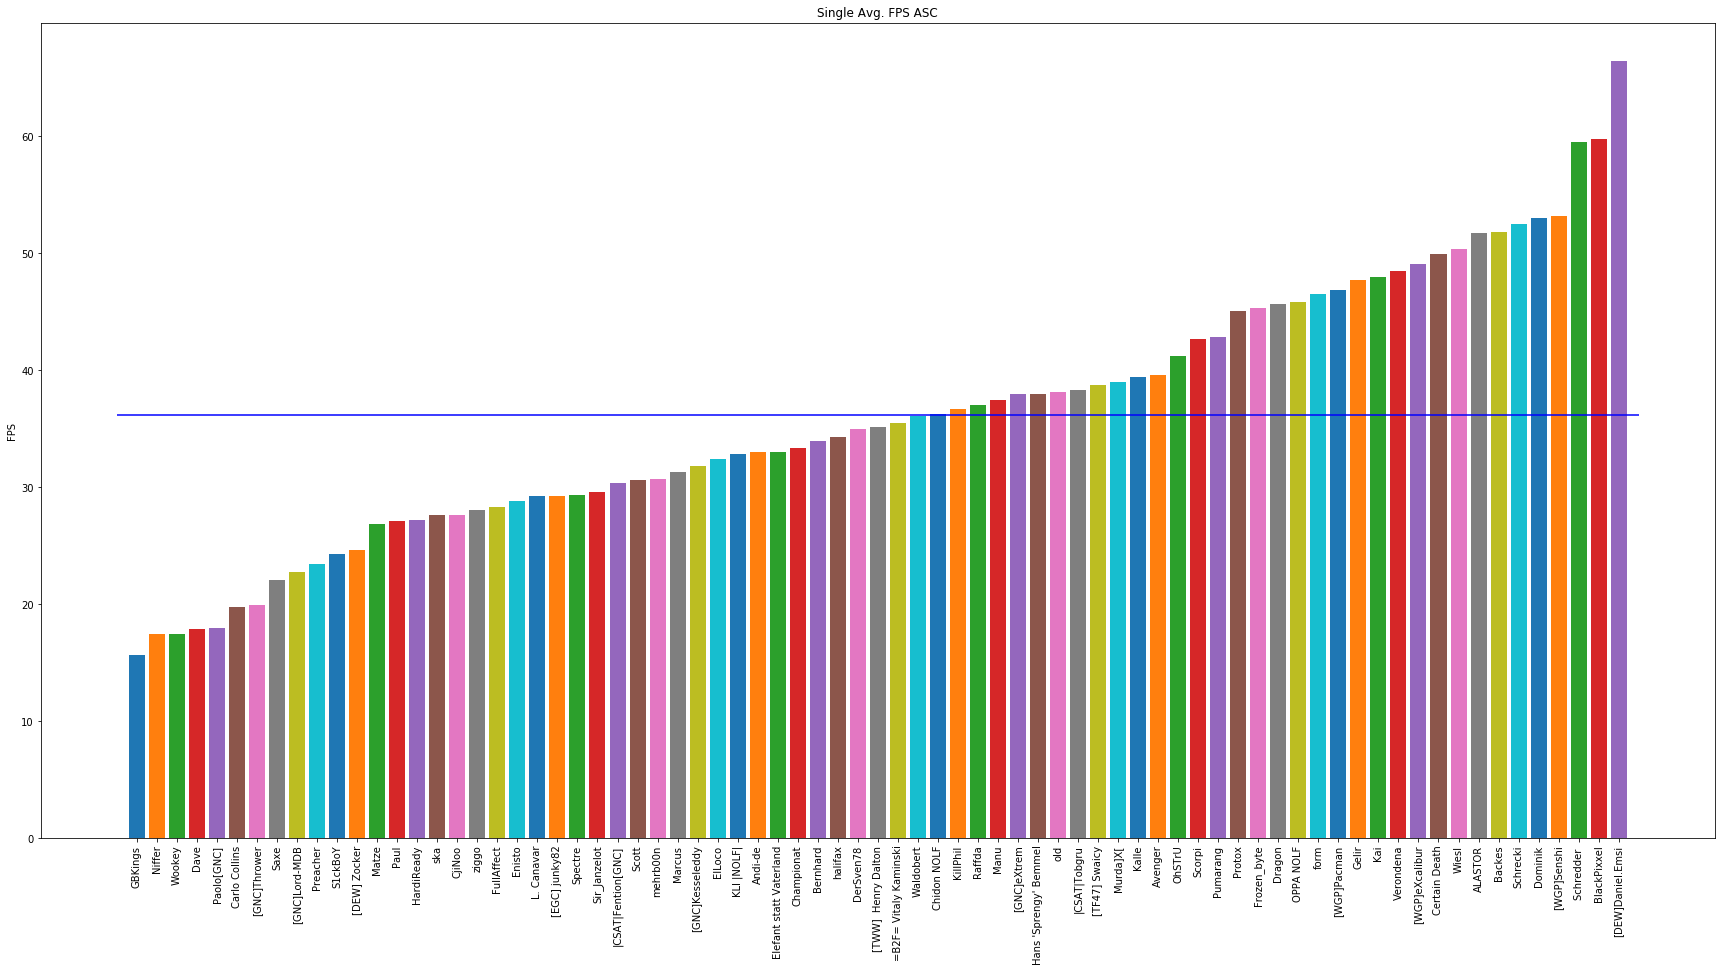

In [11]:
# plot data
col = 2
# single avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)
    
plt.ylabel("FPS")
plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("Single Avg. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_avg_fps.png"))


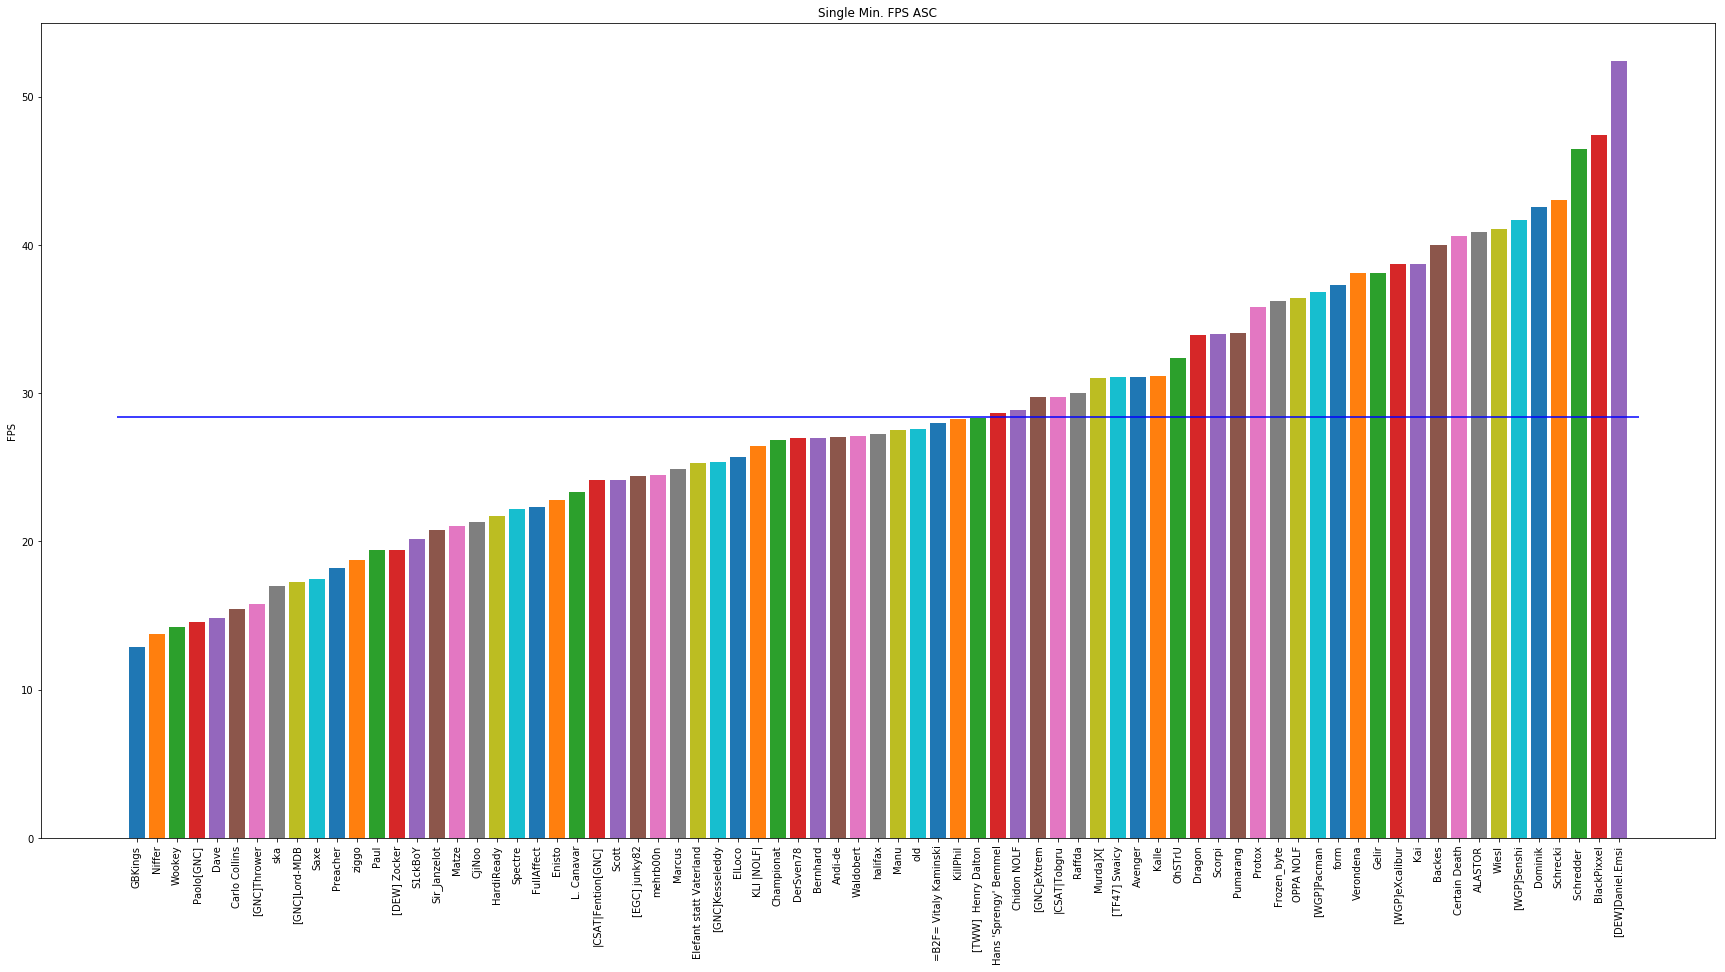

In [12]:
# plot data
col = 3
# single min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)

plt.ylabel("FPS")
plt.xticks(rotation=90)

#plt.legend(loc="right")
plt.title("Single Min. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_min_fps.png"))

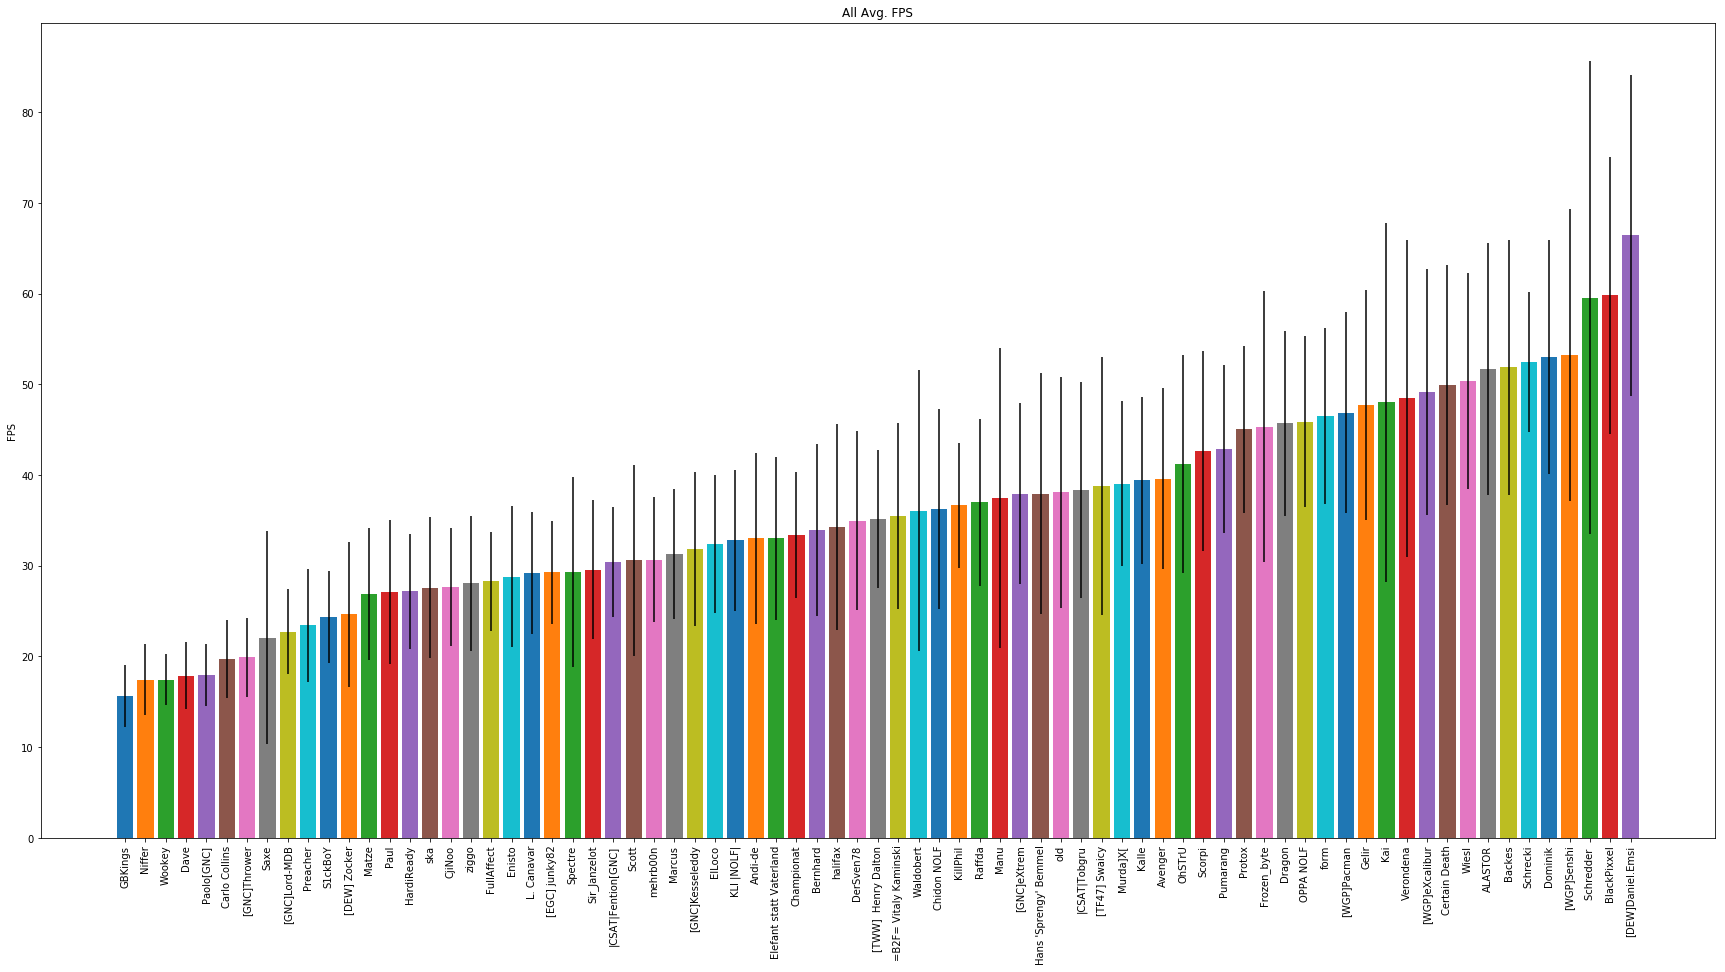

In [13]:
# plot data
col = 0
# all avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)

plt.ylabel("FPS")
plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Avg. FPS")
plt.savefig(os.path.join(os.curdir, r"output\all_avg_fps.png"))

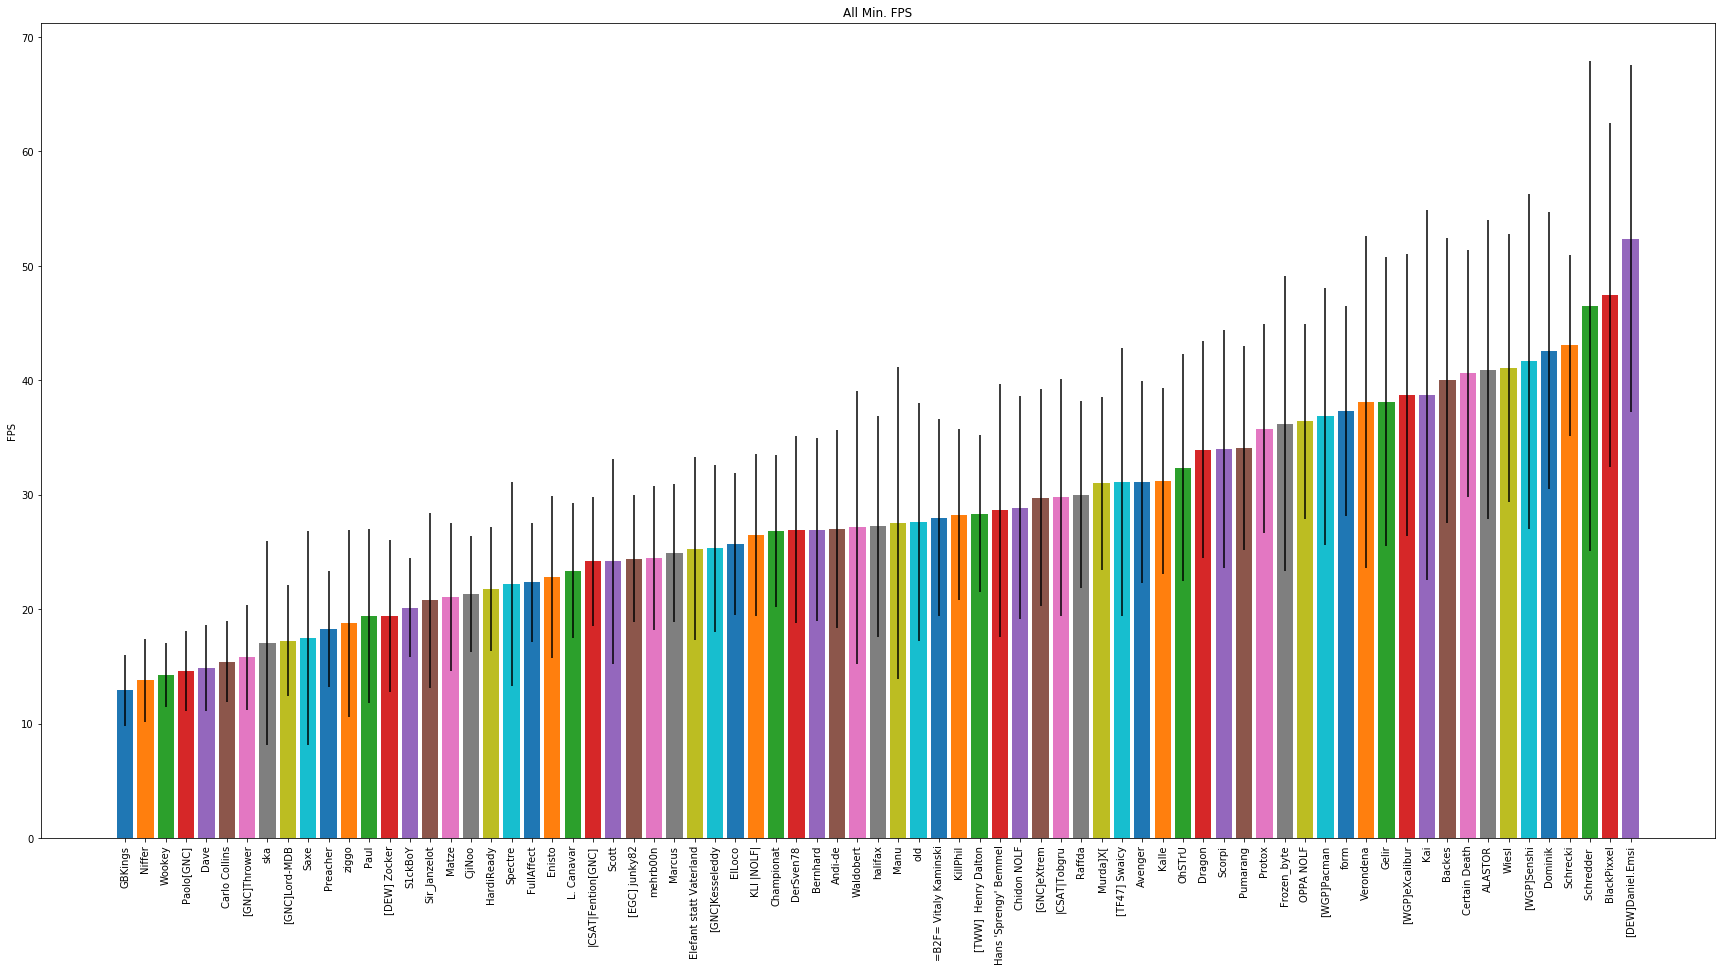

In [15]:
# plot data
col = 1
# all min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)

plt.ylabel("FPS")
plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Min. FPS")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps.png'))

C:\tools\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[33.65602694 39.79845118 43.52430976 45.36323232 45.84484848 45.49333333
 45.30591631 45.23463203 44.70406926 43.17113997 42.95238095 42.77067821
 42.89621934 42.82810967 42.67393939 43.15965368 42.16034632 41.30805195
 41.88646465 42.55451659 43.52813853 44.47867244 44.93471861 45.36011544
 44.56005772 43.39907648 41.74106782 40.31255411 39.54002886 39.09015873
 38.9171686  39.03743536 39.69215865 39.31810538 39.63230139 39.92116688
 39.8024453  38.84934693 38.31075151 37.19079193 36.67140838 36.74236735
 37.13193206 37.3250111  36.08458547 34.85690565 34.39886141 33.75591532
 34.0872324  35.27065172 35.87724604 36.47144636 36.59508984 36.00438831
 35.5558323  34.87054498 34.53875348 34.59314031 34.51257437 34.53912906
 34.85499153 34.9908124  34.95446392 35.22594092 35.50872884 35.59331409
 34.98857624 34.27188552 33.78006253 34.38798701 34.18987494 34.33369408
 34.40145503 34.44125782 34.79316979 35.50090188 35.77922078 36.22324435
 35.46843434 34.36261424 33.47198172 32.66233766 32

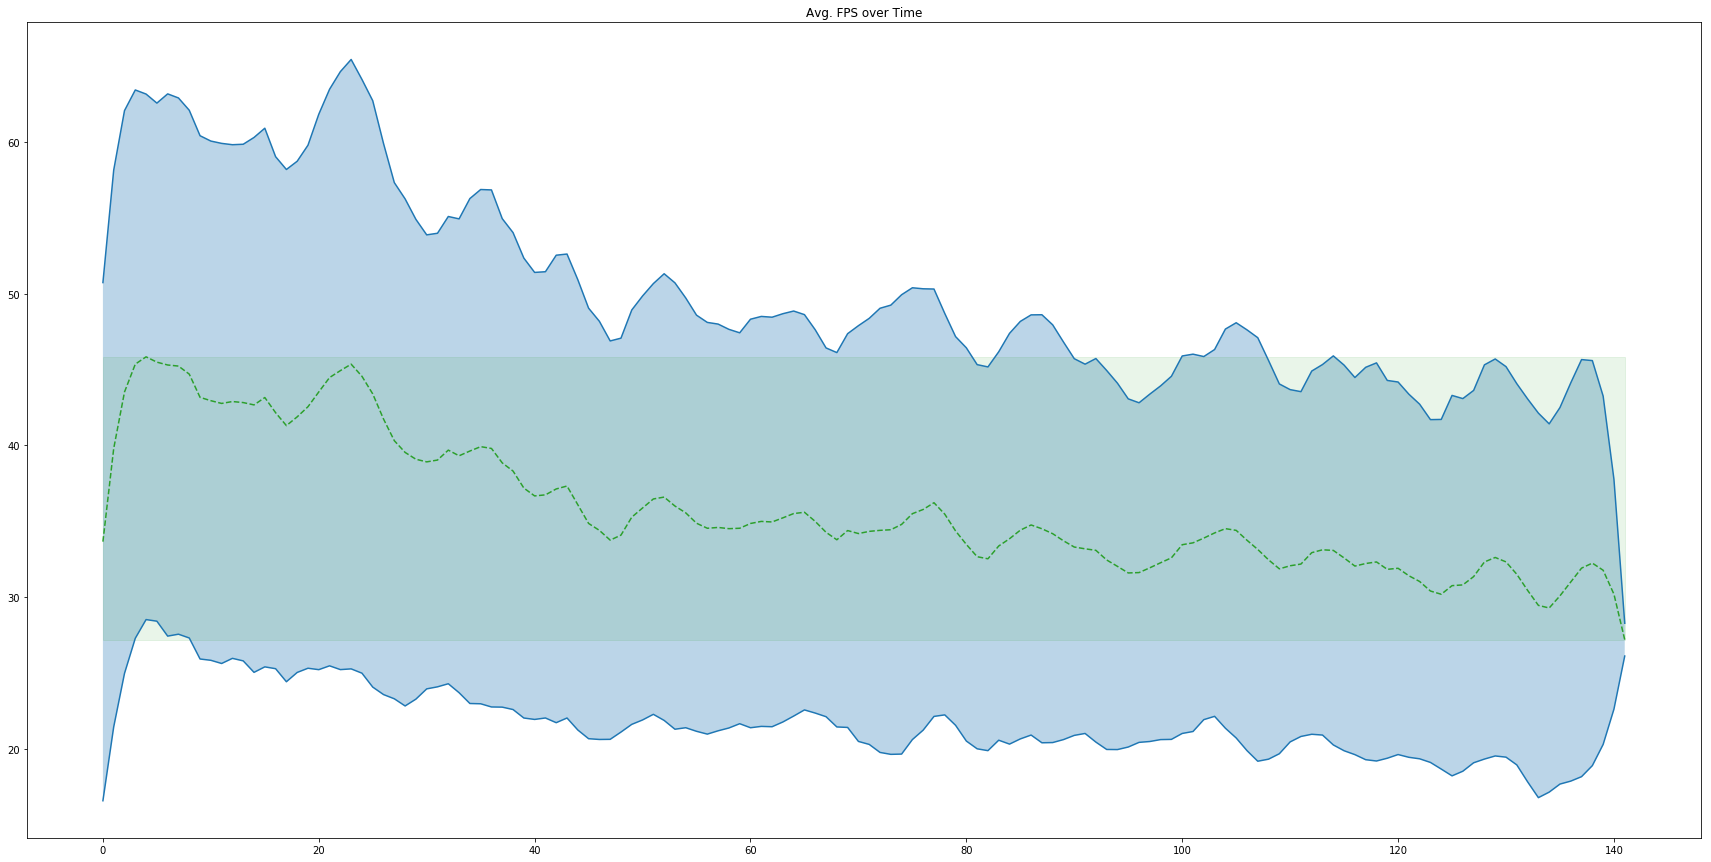

In [3]:
# plot data
from scipy import signal
col = 0

max_nr_fps = np.max([len(x[col]) for x in player_fps.values()])
M = np.empty((len(player_fps), max_nr_fps))
M[:] = np.nan
for i, kv in enumerate(player_fps.items()):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_avg_fps_over_time.png'))

[17.24053872 29.623367   36.42706109 39.01633478 38.75590188 37.09021645
 36.59763348 36.16363636 35.62886003 34.43544012 33.94037518 33.91867244
 34.13183261 34.19070707 34.24       34.72709957 33.48606061 32.45137085
 32.69691198 33.43076479 34.47451659 35.7162482  36.64600289 37.15746032
 36.3159596  35.46689755 33.68531025 31.93858586 30.42395382 29.50753247
 29.25062127 29.14707149 30.35151671 30.87719512 31.54550057 32.18357162
 31.77367575 30.67519581 30.16270148 28.98521311 28.91768641 29.19769093
 29.81391131 30.05835902 28.3515549  27.0705687  26.43260393 25.45887446
 25.89853525 27.04245982 27.89604459 28.66198185 28.94882287 28.72347744
 28.47980786 27.71855542 27.53857558 27.38420902 27.19811949 27.23209014
 27.66472125 27.75960848 27.82849038 28.10760162 28.46683897 28.4244228
 27.73593074 27.05321068 26.70677008 27.49561087 27.18668831 27.14424002
 26.94715007 26.77837903 26.91576479 27.53439153 27.85107023 28.51990139
 27.78956229 26.66816979 25.63095238 24.80417268 24.

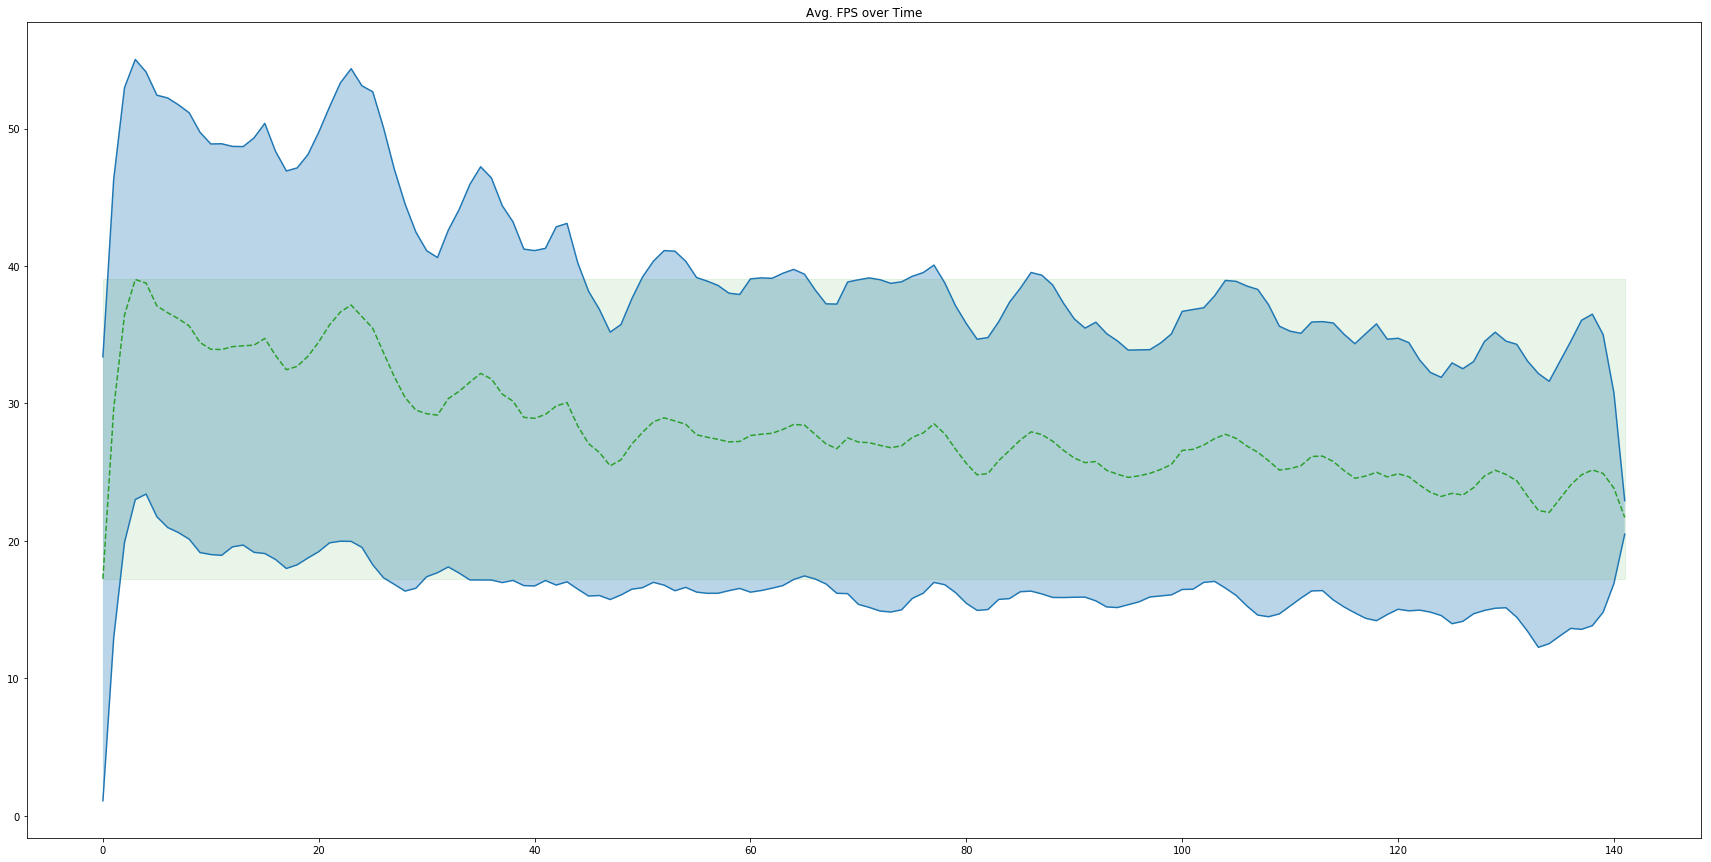

In [4]:
# plot data
from scipy import signal
col = 1

max_nr_fps = np.max([len(x[col]) for x in player_fps.values()])
M = np.empty((len(player_fps), max_nr_fps))
M[:] = np.nan
for i, kv in enumerate(player_fps.items()):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps_over_time.png'))